# How do coastal wildfires emissoins impact air quality?

_This is an EDA notebook. Other notebooks, including for scraping / data acquisition and modeling, can be found in the same `/code/` folder._

Our team:

* Helen Meigs
* Veronica Antonova
* Riley Robertson

Let's start with all the required library imports to read in and analyze our data.

In [ ]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, \
numpy as np

We have several major areas requiring analysis:

1. Air pollution / quality data
2. Fire and smoke data

## Data dictionary

## Pollution

Questions to be answered:

* Relationship in the max / peak time of the different pollutants


Let's read in our data.

* Pollution dataset source: https://www.kaggle.com/sogun3/uspollution
* PM2.5 dataset source: Kaggle

In [2]:
#syntactic ref from https://towardsdatascience.com/how-to-read-csv-file-using-pandas-ab1f5e7e7b58
pollution = pd.read_csv(
    '../data/pollution/pollution_us_2000_2016.csv',#, index_col = 'Unnamed:0')
usecols=['State Code', 'County Code', 'Site Num', 'Address',
       'State', 'County', 'City', 'Date Local', 'NO2 Units', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI']
)

In [3]:
#air_q = pd.read_csv() #insert Riley's merged daily and / or hourly files
#file_test = '../data/daily_data.dat'
#pd.read_csv(file_test, sep='|', header=None)

### Pollution dataset exploration

Let's understand the structure of our files.

In [4]:
pollution.columns

Index(['State Code', 'County Code', 'Site Num', 'Address', 'State', 'County',
       'City', 'Date Local', 'NO2 Units', 'NO2 Mean', 'NO2 1st Max Value',
       'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units', 'O3 Mean',
       'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI'],
      dtype='object')

In [5]:
pollution.dtypes

State Code             int64
County Code            int64
Site Num               int64
Address               object
State                 object
County                object
City                  object
Date Local            object
NO2 Units             object
NO2 Mean             float64
NO2 1st Max Value    float64
NO2 1st Max Hour       int64
NO2 AQI                int64
O3 Units              object
O3 Mean              float64
O3 1st Max Value     float64
O3 1st Max Hour        int64
O3 AQI                 int64
SO2 Units             object
SO2 Mean             float64
SO2 1st Max Value    float64
SO2 1st Max Hour       int64
SO2 AQI              float64
CO Units              object
CO Mean              float64
CO 1st Max Value     float64
CO 1st Max Hour        int64
CO AQI               float64
dtype: object

We have a few columns acting as numeric, when they are not; let's convert them.

In [6]:
#from docstring: df.astype({'col1': 'int32'}).dtypes
pollution['State Code'] = pollution.astype(
    {'State Code': 'category'}).dtypes

In [7]:
pollution['County Code'] = pollution.astype(
    {'County Code': 'category'}).dtypes

In [8]:
pollution['Site Num'] = pollution.astype(
    {'Site Num': 'category'}).dtypes

In [9]:
#confirm types now
pollution.dtypes

State Code            object
County Code           object
Site Num              object
Address               object
State                 object
County                object
City                  object
Date Local            object
NO2 Units             object
NO2 Mean             float64
NO2 1st Max Value    float64
NO2 1st Max Hour       int64
NO2 AQI                int64
O3 Units              object
O3 Mean              float64
O3 1st Max Value     float64
O3 1st Max Hour        int64
O3 AQI                 int64
SO2 Units             object
SO2 Mean             float64
SO2 1st Max Value    float64
SO2 1st Max Hour       int64
SO2 AQI              float64
CO Units              object
CO Mean              float64
CO 1st Max Value     float64
CO 1st Max Hour        int64
CO AQI               float64
dtype: object

How big is our data?

In [10]:
pollution.shape

(1746661, 28)

Let's see, what's inside our data.

In [11]:
pollution.head(2).T

,0,1
State Code,NaN,NaN
County Code,NaN,NaN
Site Num,NaN,NaN
Address,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN
State,Arizona,Arizona
County,Maricopa,Maricopa
City,Phoenix,Phoenix
Date Local,2000-01-01,2000-01-01
NO2 Units,Parts per billion,Parts per billion
NO2 Mean,19.0417,19.0417


In [12]:
pollution.describe().T.round(4)

,count,mean,std,min,25%,50%,75%,max
NO2 Mean,1746661.0,12.8219,9.5048,-2.0000,5.7500,10.7391,17.7136,139.5417
NO2 1st Max Value,1746661.0,25.4148,15.9996,-2.0000,13.0000,24.0000,35.7000,267.0000
NO2 1st Max Hour,1746661.0,11.7310,7.8775,0.0000,5.0000,9.0000,20.0000,23.0000
NO2 AQI,1746661.0,23.8982,15.1628,0.0000,12.0000,23.0000,33.0000,132.0000
O3 Mean,1746661.0,0.0261,0.0114,0.0000,0.0179,0.0259,0.0339,0.0951
O3 1st Max Value,1746661.0,0.0392,0.0153,0.0000,0.0290,0.0380,0.0480,0.1410
O3 1st Max Hour,1746661.0,10.1705,4.0031,0.0000,9.0000,10.0000,11.0000,23.0000
O3 AQI,1746661.0,36.0501,19.7804,0.0000,25.0000,33.0000,42.0000,218.0000
SO2 Mean,1746661.0,1.8704,2.7604,-2.0000,0.2565,0.9875,2.3250,321.6250
SO2 1st Max Value,1746661.0,4.4922,7.6799,-2.0000,0.8000,2.0000,5.0000,351.0000


Which states have the most emissions?

In [13]:
pollution['State'].value_counts()

California              576142
Pennsylvania            188892
Texas                   123208
New York                 70487
Arizona                  69840
Illinois                 50116
North Carolina           37126
Virginia                 36422
Arkansas                 35332
Colorado                 35188
Oklahoma                 34420
Kansas                   31480
Connecticut              29933
New Jersey               26732
Florida                  25918
Iowa                     25850
District Of Columbia     25696
Louisiana                23874
Maine                    23623
Maryland                 23538
Ohio                     22934
Massachusetts            21572
Hawaii                   20276
Missouri                 19778
Kentucky                 14686
Indiana                  13926
Wyoming                  13048
Oregon                   11794
North Dakota             11018
Nevada                    9698
Country Of Mexico         9506
New Hampshire             9294
Utah    

Most of our emissions are found in the following:

California              
Pennsylvania            
Texas                   
New York                 
Arizona

However, for purposes, we are going to concentrate on states west of the Rocky mountains.

State lines are superficial for purposes of understanding movement of fires. So the idea here is that the Rockies provide a better 'line' for us to make a cutoff, since they really do break airflow, and there will be drastically different air-quality and pollution-scapes to the east v. west.

In [ ]:
#dist

### Particulate matter dataset

We will repeat the initial file review steps for the PM dataset as well.

In [14]:
#pull in file
pm = pd.read_csv('../data/pollution/pm2.5_epa_2010_2017.csv')

In [15]:
#peek
pm.head(3)

,state_code,county_code,site_num,parameter_code,poc,latitude,longitude,datum,parameter_name,sample_duration,...,aqi,method_code,method_name,local_site_name,address,state_name,county_name,city_name,cbsa_name,date_of_last_change
0,6,83,9000,88128,1,34.733889,-120.008349,WGS84,Lead PM2.5 LC,24 HOUR,...,NaN,800,IMPROVE Module A with Cyclone Inlet-Teflon Fil...,San Rafael Wilderness,San Rafael,California,Santa Barbara,Not in a city,Santa Maria-Santa Barbara CA,2016-08-30
1,49,17,101,88132,1,37.618383,-112.174368,WGS84,Manganese PM2.5 LC,24 HOUR,...,NaN,800,IMPROVE Module A with Cyclone Inlet-Teflon Fil...,NaN,Bryce Canyon NP,Utah,Garfield,Not in a city,NaN,2015-07-28
2,16,23,101,88136,1,43.460556,-113.562222,WGS84,Nickel PM2.5 LC,24 HOUR,...,NaN,800,IMPROVE Module A with Cyclone Inlet-Teflon Fil...,Craters of the Moon National Monument Visitor ...,CRATERS OF THE MOON NATIONAL MON IDAHO,Idaho,Butte,Not in a city,Idaho Falls ID,2015-07-31


In [16]:
#desc stats
pm.describe().T.round(4)

,count,mean,std,min,25%,50%,75%,max
state_code,338926.0,20.4630,20.0146,4.0000,6.0000,6.0000,41.0000,53.0000
county_code,338926.0,38.2106,27.5008,1.0000,17.0000,35.0000,59.0000,111.0000
site_num,338926.0,2935.9475,3933.8806,1.0000,10.0000,101.0000,8001.0000,9997.0000
parameter_code,338926.0,88121.5741,12.5566,88103.0000,88112.0000,88128.0000,88132.0000,88136.0000
poc,338926.0,2.6654,2.4504,1.0000,1.0000,1.0000,5.0000,12.0000
latitude,338926.0,38.8288,5.0309,31.3374,34.1939,37.6875,42.9099,48.7314
longitude,338926.0,-117.5479,4.3689,-124.6249,-121.4271,-118.8248,-112.8010,-109.3891
pollutant_standard,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
observation_count,338926.0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
observation_percent,338926.0,100.0000,0.0000,100.0000,100.0000,100.0000,100.0000,100.0000


In [17]:
#shape
pm.shape

(338926, 29)

In [18]:
#dtypes
pm.dtypes

state_code               int64
county_code              int64
site_num                 int64
parameter_code           int64
poc                      int64
latitude               float64
longitude              float64
datum                   object
parameter_name          object
sample_duration         object
pollutant_standard     float64
date_local              object
units_of_measure        object
event_type              object
observation_count        int64
observation_percent    float64
arithmetic_mean        float64
first_max_value        float64
first_max_hour           int64
aqi                    float64
method_code              int64
method_name             object
local_site_name         object
address                 object
state_name              object
county_name             object
city_name               object
cbsa_name               object
date_of_last_change     object
dtype: object

In [19]:
#conversions
pm['state_code'] = pm.astype(
    {'state_code': 'category'}).dtypes

In [20]:
pm['county_code'] = pm.astype(
    {'county_code': 'category'}).dtypes

In [21]:
pm['site_num'] = pm.astype(
    {'site_num': 'category'}).dtypes

In [22]:
pm['parameter_code'] = pm.astype(
    {'parameter_code': 'category'}).dtypes

In [23]:
pm['poc'] = pm.astype(
    {'poc': 'category'}).dtypes

In [24]:
#confirm types
pm.dtypes

state_code              object
county_code             object
site_num                object
parameter_code          object
poc                     object
latitude               float64
longitude              float64
datum                   object
parameter_name          object
sample_duration         object
pollutant_standard     float64
date_local              object
units_of_measure        object
event_type              object
observation_count        int64
observation_percent    float64
arithmetic_mean        float64
first_max_value        float64
first_max_hour           int64
aqi                    float64
method_code              int64
method_name             object
local_site_name         object
address                 object
state_name              object
county_name             object
city_name               object
cbsa_name               object
date_of_last_change     object
dtype: object

In [25]:
#now EDA
#changes YoY


In [26]:
#by locale

### Air quality -- additional metrics

In [ ]:
#pull in air q hourly files to merge

## Fire and smoke

Questions to be answered:

* Number of prescribed fires vs. wildfires per state, per year --> trends over years?  trends change over years in a certain state?  does more prescribed burns necessarily equal fewer wildfires?

* similar to above, but # acres instead of count

* map counties with the worst smoke_score (most days of smoke_score=3) -- same counties hit every year?  or totally random?

* Looking at similiar-size fires and their impacts throughout time

Note on data: data may include international locations.

Data source: fire resarch contact, Cristobal Martinez, cpaismz@berkeley.edu.

_Additional information about some of the calculations around fire perimeters can be found at this [source](https://frap.fire.ca.gov/frap-projects/fire-perimeters/)._

In [27]:
#pull in data
smoke = pd.read_csv('../data/fire/MTBS_merge_smoke_inProgress.csv')

In [28]:
#peek
smoke.head()

,state,county_name,date,smoke_score,lat_smo,lon_smo,event_id,incid_name,incid_type,asmnt_type,...,burnbndlon,nodata_t,incgreen_t,low_t,mod_t,high_t,lon_wf,lat_wf,reverse_geocode,state_full
0,AZ,Gila County,20100604,1.0,33.799665,-110.811659,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AZ,Gila County,20100606,1.0,33.799665,-110.811659,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AZ,Gila County,20100624,1.0,33.799665,-110.811659,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AZ,Gila County,20100627,1.0,33.799665,-110.811659,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AZ,Gila County,20100713,1.0,33.799665,-110.811659,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#grasp the size of data
smoke.shape

(67561, 22)

In [49]:
#look at data types
smoke.dtypes

state                      object
county_name                object
date               datetime64[ns]
smoke_score               float64
lat_smo                   float64
lon_smo                   float64
event_id                   object
incid_name                 object
incid_type                 object
asmnt_type                 object
burnbndac                 float64
burnbndlat                float64
burnbndlon                float64
nodata_t                  float64
incgreen_t                float64
low_t                     float64
mod_t                     float64
high_t                    float64
lon_wf                    float64
lat_wf                    float64
reverse_geocode            object
state_full                 object
dtype: object

Let's convert date to the correct type.

In [48]:
smoke['date'] = pd.to_datetime(\
       smoke['date'], format='%Y%m%d', errors='ignore')

Note: `burnbndac` refers to acres within the burn boundaries.

What types of fires do we have?

In [47]:
#understand the data some more
smoke['incid_type'].value_counts()

Wildfire           1875
Prescribed Fire     114
Name: incid_type, dtype: int64

In [52]:
smoke['incid_type'].value_counts(normalize=True).round(2)

Wildfire           0.94
Prescribed Fire    0.06
Name: incid_type, dtype: float64

As expected based on our initial investigation (offline), we have two types of fire: Wildfire and Prescribed. Per [source](https://www.nps.gov/articles/what-is-a-prescribed-fire.htm), a prescribed fire is a planned fire and an important forestry management techniuqe. Specifically:

"Prescribed fire is one of the most important tools used to manage fire today. A scientific prescription for each fire, prepared in advance, describes its objectives, fuels, size, the precise environmental conditions under which it will burn, and conditions under which it may be suppressed. The fire may be designed to create a mosaic of diverse habitats for plants and animals, to help endangered species recover, or to reduce fuels and thereby prevent a destructive fire."

In [32]:
#drop unknown fire types
#df = df.drop(df[<some boolean condition>].index) from https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression

smoke.drop(
    smoke[smoke['incid_type'] == 'Unknown'].index,inplace=True)


Let's further check out and understand the types of fire.

In [50]:
smoke['asmnt_type'].value_counts()

Initial          1143
Extended          779
Initial (SS)       59
Extended (SS)       8
Name: asmnt_type, dtype: int64

How big are fires?

In [57]:
smoke['smoke_score'].value_counts(normalize=True).round(2)

1.0    0.70
2.0    0.23
3.0    0.08
Name: smoke_score, dtype: float64

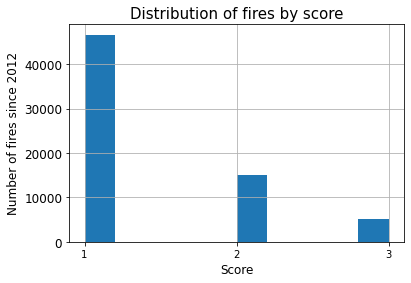

In [63]:
#dist of smoke scores
smoke['smoke_score'].hist();
plt.title('Distribution of fires by score', size = 15)
plt.xlabel('Score', size = 12);
plt.ylabel('Number of fires since 2012', size = 12);
plt.xticks([1.00, 2.00, 3.00]);
plt.yticks(size=12)
plt.savefig('../assets/fires_by_score.jpg');

The vast majority of fires score between 1 and 1.2. Just under 1/3rd of fires score a 2 or more.


Let's understand the size of the fires.

In [75]:
#frequency of fire by state
smoke['state'].value_counts()

CA    19035
ID    13837
OR    12072
WA    11370
UT     4177
NV     3494
AZ     3401
MT       97
WY       42
NM       14
CO        5
Name: state, dtype: int64

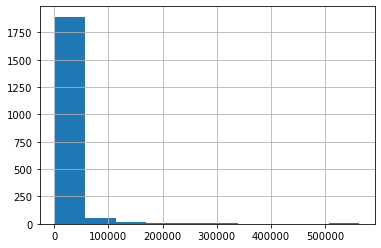

In [67]:
#by acreage
smoke['burnbndac'].hist();

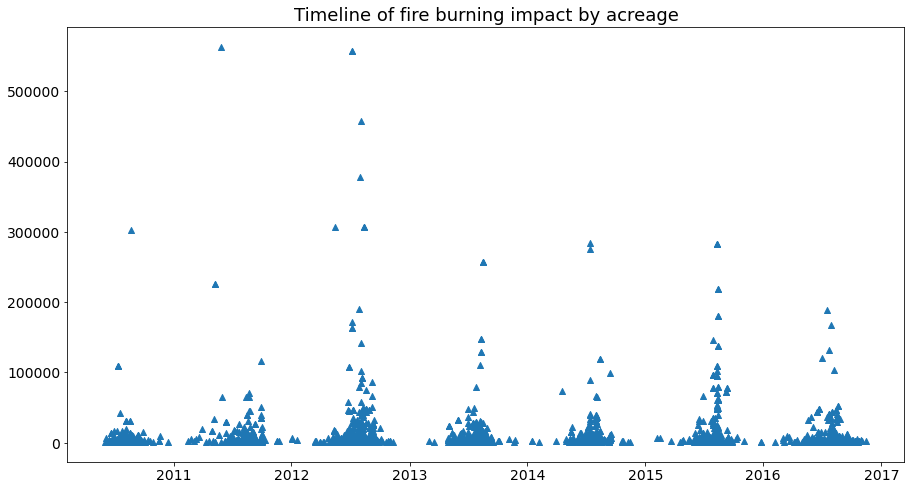

In [85]:
#timelapse

plt.figure(figsize = (15,8))
plt.scatter(smoke['date'], smoke['burnbndac'], marker = '^');
plt.xticks(size=14)
plt.yticks(size=14)
plt.title('Timeline of fire burning impact by acreage', size=18);
plt.savefig('../assets/fire_by_acreage.jpg');

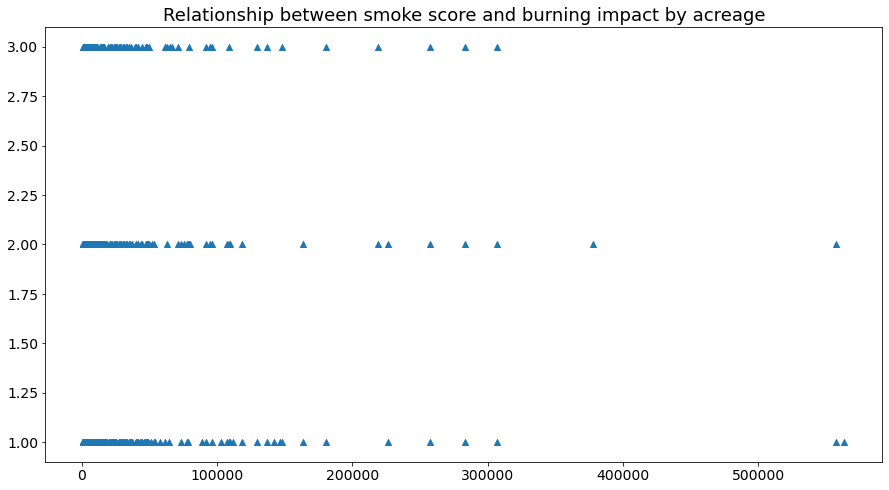

In [88]:
#scatter by smoke score to acreage
plt.figure(figsize = (15,8))
plt.scatter(smoke['burnbndac'], smoke['smoke_score'], marker = '^');
plt.xticks(size=14)
plt.yticks(size=14)
plt.title('Relationship between smoke score and burning impact by acreage', size=18);


There seems to be no relationship we can see between the smoke score and acreage.

In [33]:
#EDA -- size of fire by incident type and size, state
#might want to account for per-square footage: feature eng.

#pull out:
#smoke_score
#date
#state
#incident type - `incid_type` - this is the wild vs. Rx
#acreage - `burnbndac`

## Putting it all together

Let's look at just the states of interest and see if there are any insights to draw when we pull together pollution and fire data.

In [34]:
#pull in merged file
merged = pd.read_csv(
    '../data/all_smoke_fire_pollution.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (4,15,16,17,23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [35]:
#clean out dupes
merged.drop_duplicates(inplace=True)

Because of the way the data were merged, we _expect_ many nulls. This is because not every air quality measurement will have corresponding fire data, as an example.

In [36]:
merged.head(2).T

,0,1
state,AZ,AZ
city,NaN,NaN
county_name,Gila County,Gila County
date,20100604,20100606
incid_type,NaN,NaN
burnbndac,NaN,NaN
smoke_score,1,1
no2_max_ppb,NaN,NaN
no2_aqi_label,NaN,NaN
o3_max_ppb,NaN,NaN


In [37]:
#confirm the locations
pd.DataFrame(merged['state'].value_counts())

,state
CA,165098
AZ,22707
OR,18414
ID,13028
WA,11487
UT,10524
NV,9795
MT,88
WY,33
NM,11


In [38]:
merged.shape

(251189, 24)

In [39]:
merged.columns

Index(['state', 'city', 'county_name', 'date', 'incid_type', 'burnbndac',
       'smoke_score', 'no2_max_ppb', 'no2_aqi_label', 'o3_max_ppb',
       'o3_aqi_label', 'so2_max_ppb', 'so2_aqi_label', 'co_max_ppm',
       'co_aqi_label', 'incid_name', 'event_id', 'asmnt_type', 'burnbndlat',
       'burnbndlon', 'lat_smo', 'lon_smo', 'aqi_address', 'reverse_geocode'],
      dtype='object')

In [40]:
#check types
merged.dtypes

state               object
city                object
county_name         object
date                 int64
incid_type          object
burnbndac          float64
smoke_score        float64
no2_max_ppb        float64
no2_aqi_label       object
o3_max_ppb         float64
o3_aqi_label        object
so2_max_ppb        float64
so2_aqi_label       object
co_max_ppm         float64
co_aqi_label        object
incid_name          object
event_id            object
asmnt_type          object
burnbndlat         float64
burnbndlon         float64
lat_smo            float64
lon_smo            float64
aqi_address         object
reverse_geocode     object
dtype: object

In [41]:
#convert dates to datetime format - from docstring:
#pd.to_datetime('13000101', format='%Y%m%d', errors='ignore')

merged['date'] = pd.to_datetime(\
       merged['date'], format='%Y%m%d', errors='ignore')

In [42]:
#confirm conversion
merged.dtypes

state                      object
city                       object
county_name                object
date               datetime64[ns]
incid_type                 object
burnbndac                 float64
smoke_score               float64
no2_max_ppb               float64
no2_aqi_label              object
o3_max_ppb                float64
o3_aqi_label               object
so2_max_ppb               float64
so2_aqi_label              object
co_max_ppm                float64
co_aqi_label               object
incid_name                 object
event_id                   object
asmnt_type                 object
burnbndlat                float64
burnbndlon                float64
lat_smo                   float64
lon_smo                   float64
aqi_address                object
reverse_geocode            object
dtype: object

In [43]:
merged.head(2)

,state,city,county_name,date,incid_type,burnbndac,smoke_score,no2_max_ppb,no2_aqi_label,o3_max_ppb,...,co_aqi_label,incid_name,event_id,asmnt_type,burnbndlat,burnbndlon,lat_smo,lon_smo,aqi_address,reverse_geocode
0,AZ,NaN,Gila County,2010-06-04,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,33.799665,-110.811659,NaN,NaN
1,AZ,NaN,Gila County,2010-06-06,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,33.799665,-110.811659,NaN,NaN


In [44]:
merged.describe().T

,count,mean,std,min,25%,50%,75%,max
burnbndac,2210.0,14122.906787,38516.472515,1001.000000,1877.000000,3505.000000,11581.500000,563664.000000
smoke_score,72163.0,1.383271,0.626298,1.000000,1.000000,1.000000,2.000000,3.000000
no2_max_ppb,196539.0,25.411648,15.288270,-1.600000,13.000000,25.000000,36.300000,156.900000
o3_max_ppb,196539.0,39.584744,15.223693,0.000000,30.000000,38.000000,48.000000,124.000000
so2_max_ppb,196539.0,1.364822,2.021354,-1.300000,0.400000,1.000000,1.800000,178.500000
co_max_ppm,196539.0,0.620905,0.510163,-0.400000,0.300000,0.500000,0.800000,17.500000
burnbndlat,2210.0,39.898157,5.118260,31.299000,34.576000,40.491500,44.233500,48.975000
burnbndlon,2210.0,-116.689470,3.680502,-124.086000,-119.378500,-117.080000,-114.189250,-108.510000
lat_smo,72163.0,39.520424,4.654655,30.717729,35.702994,39.102653,42.692191,53.356450
lon_smo,72163.0,-112.860038,11.173318,-123.932667,-120.997662,-116.760858,-110.321388,-71.305557


In [45]:
#look for timelapses


In [ ]:
#relationships
#pairplot
sns.pairplot(merged)